## THE STUDENT PERFORMANCE INDICATOR

### Life cycle of Machine Learning

- Problems Statement
- Data Collection
- EDA
- Data Preprocessing
- Model training
- Choose best model

## 1. Problem Statement
- The problem statement is how the student performance(test score) is affected by other variables like gender, parental level of education, test preparation course

## 2. Data collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [7]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
#  Import the dataset
data=pd.read_csv('stud_performance.csv')

In [9]:

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
data.shape

(1000, 8)

- Dataset contains 8 columns(features) and 1000 datapoints

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- data doesn't have null values

In [12]:
# Gender distribution
data.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [13]:
data.race_ethnicity.value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [14]:
data.parental_level_of_education.value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [15]:
data.lunch.value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [16]:
data.test_preparation_course.value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [17]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Data Description
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

#### Finding missing values

In [18]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- No missing values

## Finding duplicate values

In [19]:
data.duplicated().sum()

np.int64(0)

- No duplicate values

In [20]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Explore the data

In [21]:
print("Gender values :",end="")
print(data.gender.unique())
print()
print("race_ethnicity values :",end="")
print(data.race_ethnicity.unique())
print()
print("parental_level_of_education values :",end="")
print(data.parental_level_of_education.unique())
print()
print("Lunch  values :",end="")
print(data.lunch.unique())
print()
print("test_preparation_course values :",end="")
print(data.test_preparation_course.unique())

Gender values :['female' 'male']

race_ethnicity values :['group B' 'group C' 'group A' 'group D' 'group E']

parental_level_of_education values :["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Lunch  values :['standard' 'free/reduced']

test_preparation_course values :['none' 'completed']


In [22]:
numerical_features=[features for features in data.columns if data[features].dtype!='O']
categorical_features=[features for features in data.columns if data[features].dtype=='O']


In [23]:
print("Numerical Features->",numerical_features)
print("Categorical  Features->",categorical_features)

Numerical Features-> ['math_score', 'reading_score', 'writing_score']
Categorical  Features-> ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding new columns

In [24]:
data["Total_score"]=data["math_score"]+data["reading_score"]+data["writing_score"]

In [25]:
data["Average"]=data["Total_score"]/3

In [26]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
data.drop("Total_score",axis='columns')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [28]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
data[data["math_score"]==100]['Average'].count()

np.int64(7)

In [30]:
mathscore_full=data[data["math_score"]==100]['Average'].count()
writingscore_full=data[data["writing_score"]==100]['Average'].count()
readingscore_full=data[data["reading_score"]==100]['Average'].count()

In [31]:
print(mathscore_full,"have full score in maths")
print(writingscore_full,"have full score in writing")
print(readingscore_full,"got full score in reading")

7 have full score in maths
14 have full score in writing
17 got full score in reading


In [32]:
reading_less_20 = data[data['reading_score'] <= 20]['Average'].count()
writing_less_20 = data[data['writing_score'] <= 20]['Average'].count()
math_less_20 = data[data['math_score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## Data Visualization

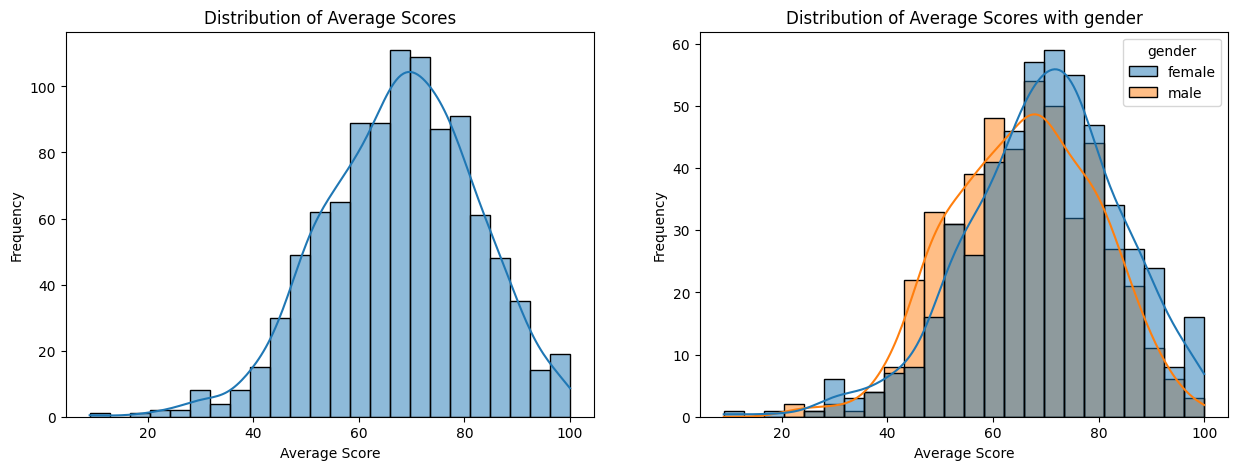

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=data,x='Average',kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.subplot(122)
sns.histplot(data=data,x='Average',kde=True,hue="gender")
plt.title('Distribution of Average Scores with gender')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

- Female students perform well than male students

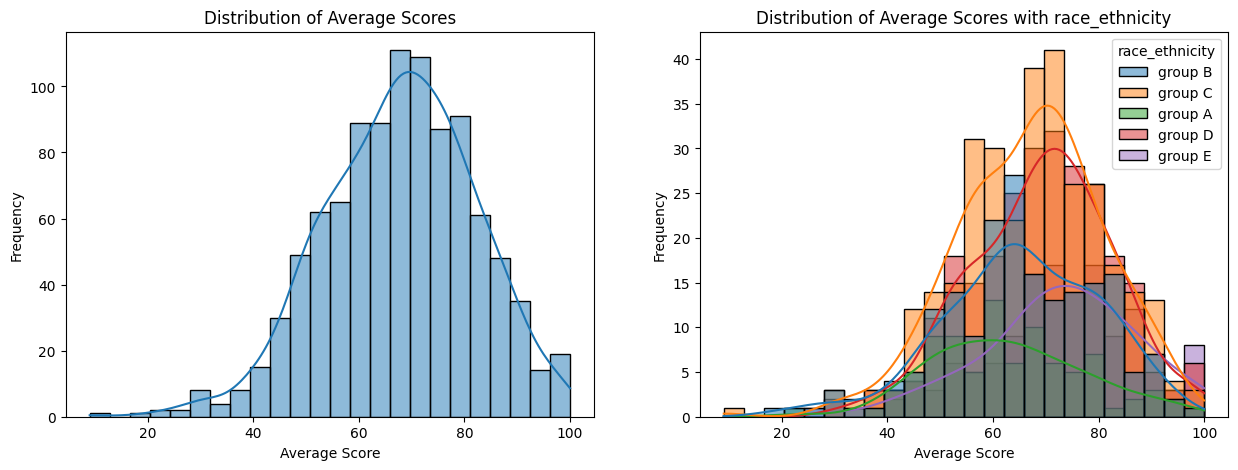

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=data,x='Average',kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.subplot(122)
sns.histplot(data=data,x='Average',kde=True,hue="race_ethnicity")
plt.title('Distribution of Average Scores with race_ethnicity')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

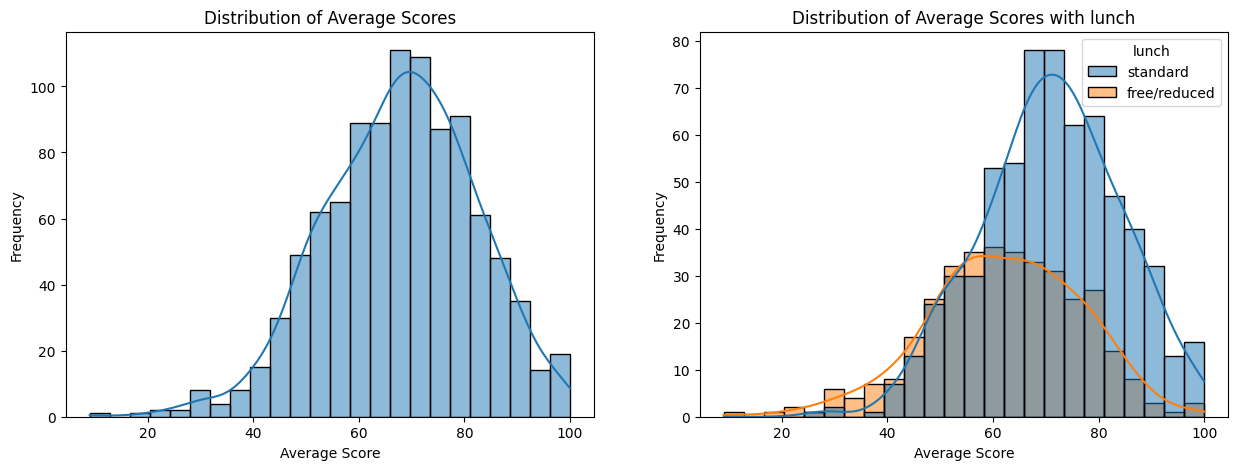

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=data,x='Average',kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.subplot(122)
sns.histplot(data=data,x='Average',kde=True,hue="lunch")
plt.title('Distribution of Average Scores with lunch')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

### Insights
- Standard lunch helps perform well in exams.

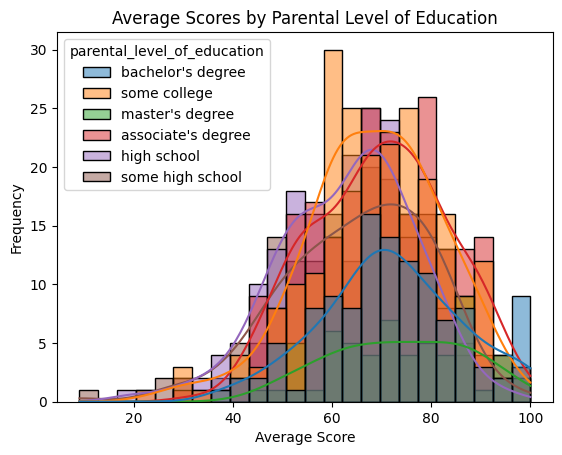

In [36]:
sns.histplot(data=data,x='Average',kde=True,hue='parental_level_of_education')
plt.title('Average Scores by Parental Level of Education')
plt.xlabel('Average Score')
plt.ylabel('Frequency') 
plt.show()

- In general parent's education don't help student perform well in exam.

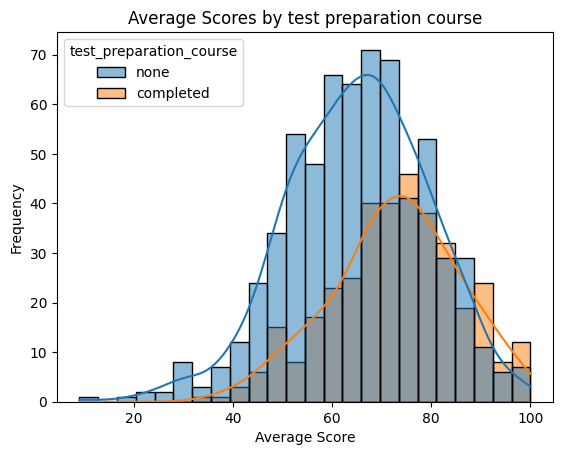

In [37]:
sns.histplot(data=data,x='Average',kde=True,hue='test_preparation_course')
plt.title('Average Scores by test preparation course')
plt.xlabel('Average Score')
plt.ylabel('Frequency') 
plt.show()

In [38]:
# Average score by gender
print(data.groupby('gender')['Average'].mean())

# Average score by lunch type
print(data.groupby('lunch')['Average'].mean())

# Average score by test preparation course
print(data.groupby('test_preparation_course')['Average'].mean())

gender
female    69.569498
male      65.837483
Name: Average, dtype: float64
lunch
free/reduced    62.199061
standard        70.837209
Name: Average, dtype: float64
test_preparation_course
completed    72.669460
none         65.038941
Name: Average, dtype: float64


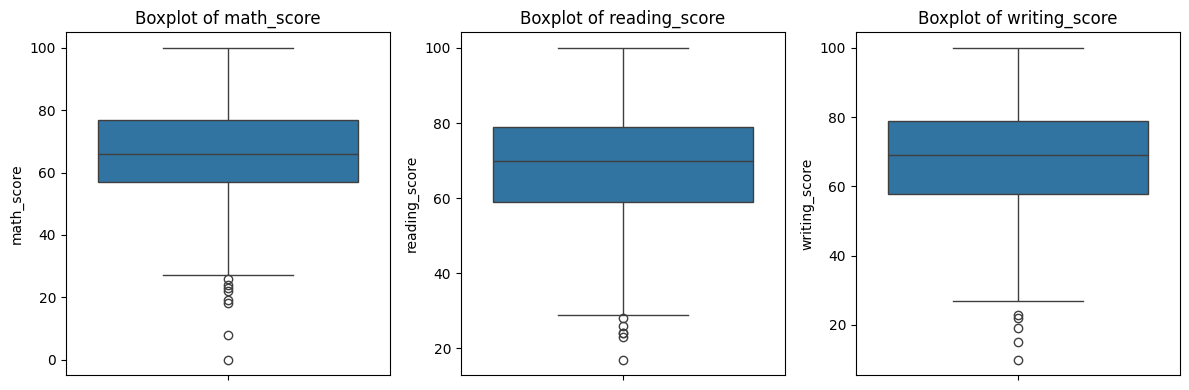

In [39]:
plt.figure(figsize=(12,4))
for i, col in enumerate(['math_score', 'reading_score', 'writing_score']):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

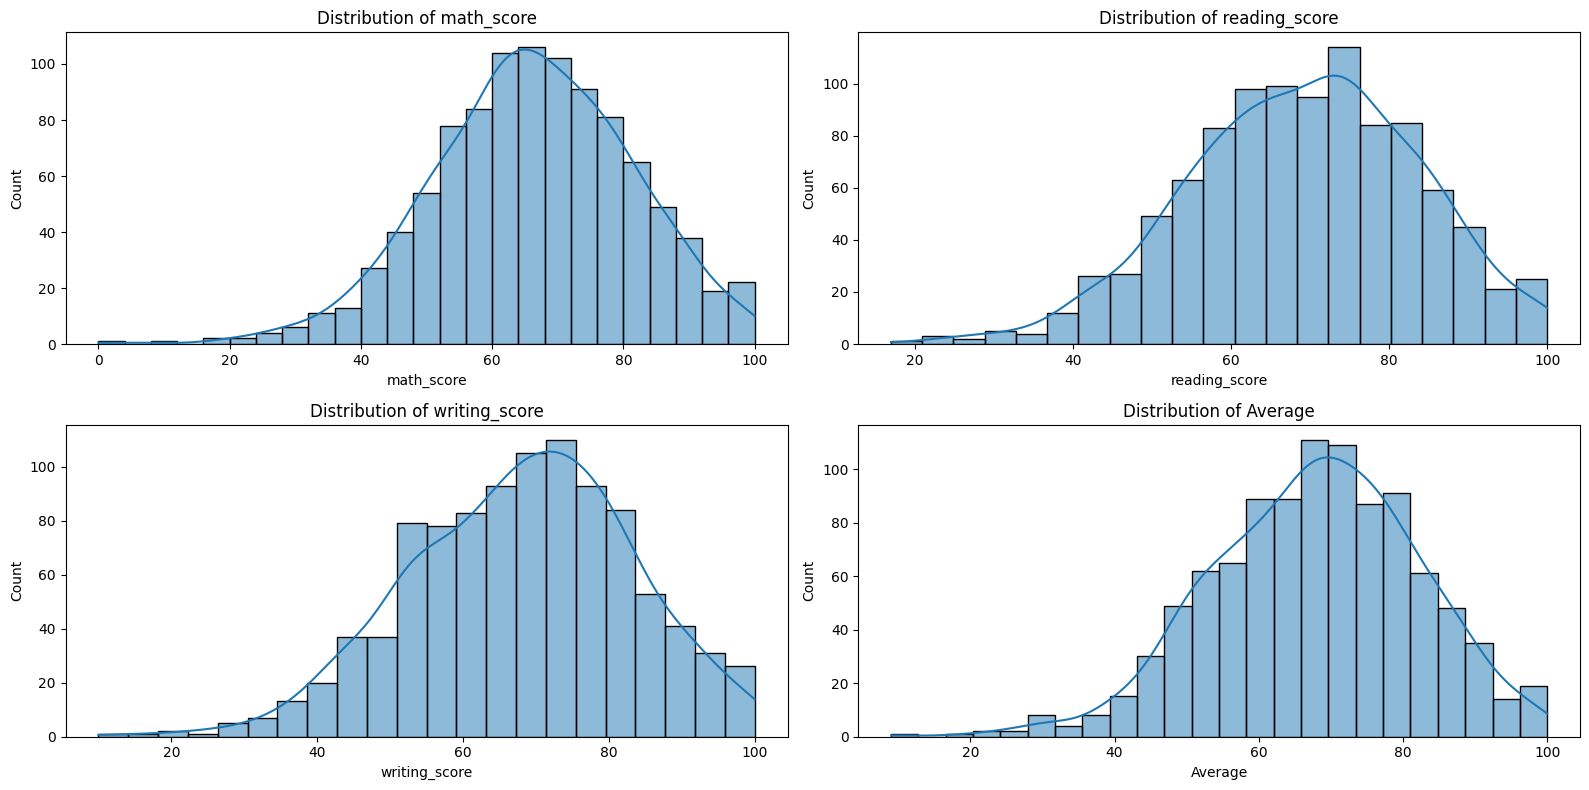

In [40]:

# Univariate Analysis

# Distribution of numerical features
num_cols = ['math_score', 'reading_score', 'writing_score', 'Average']
plt.figure(figsize=(16,8))
for i, col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

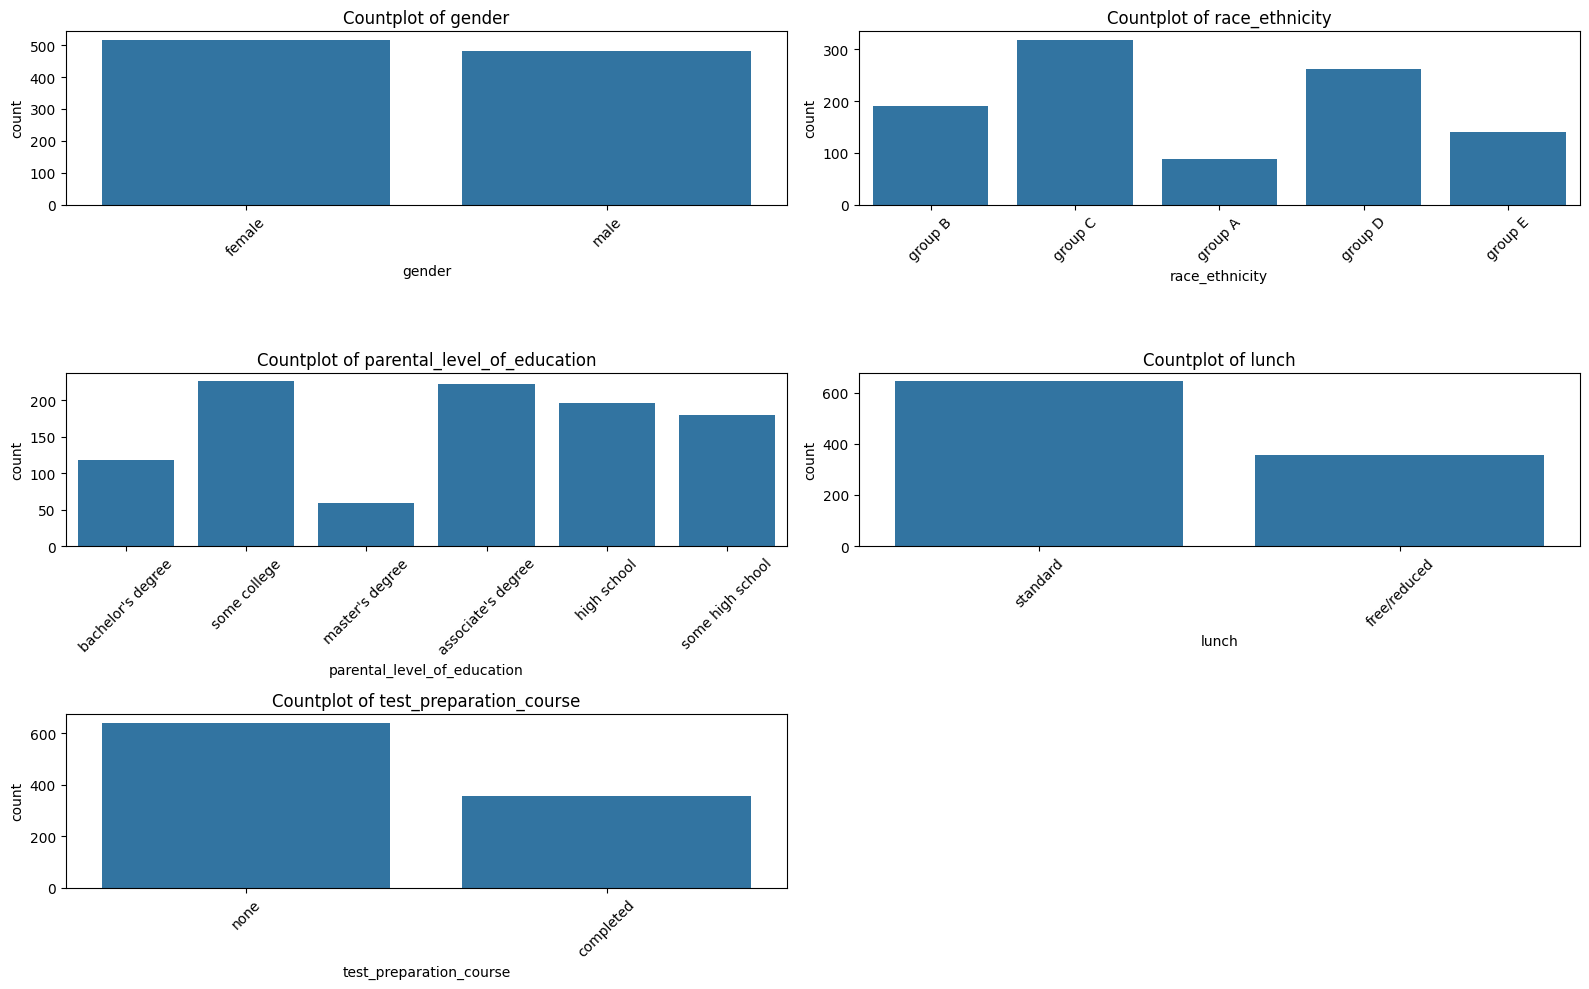

In [41]:

# Count plots for categorical features
cat_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
plt.figure(figsize=(16,10))
for i, col in enumerate(cat_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

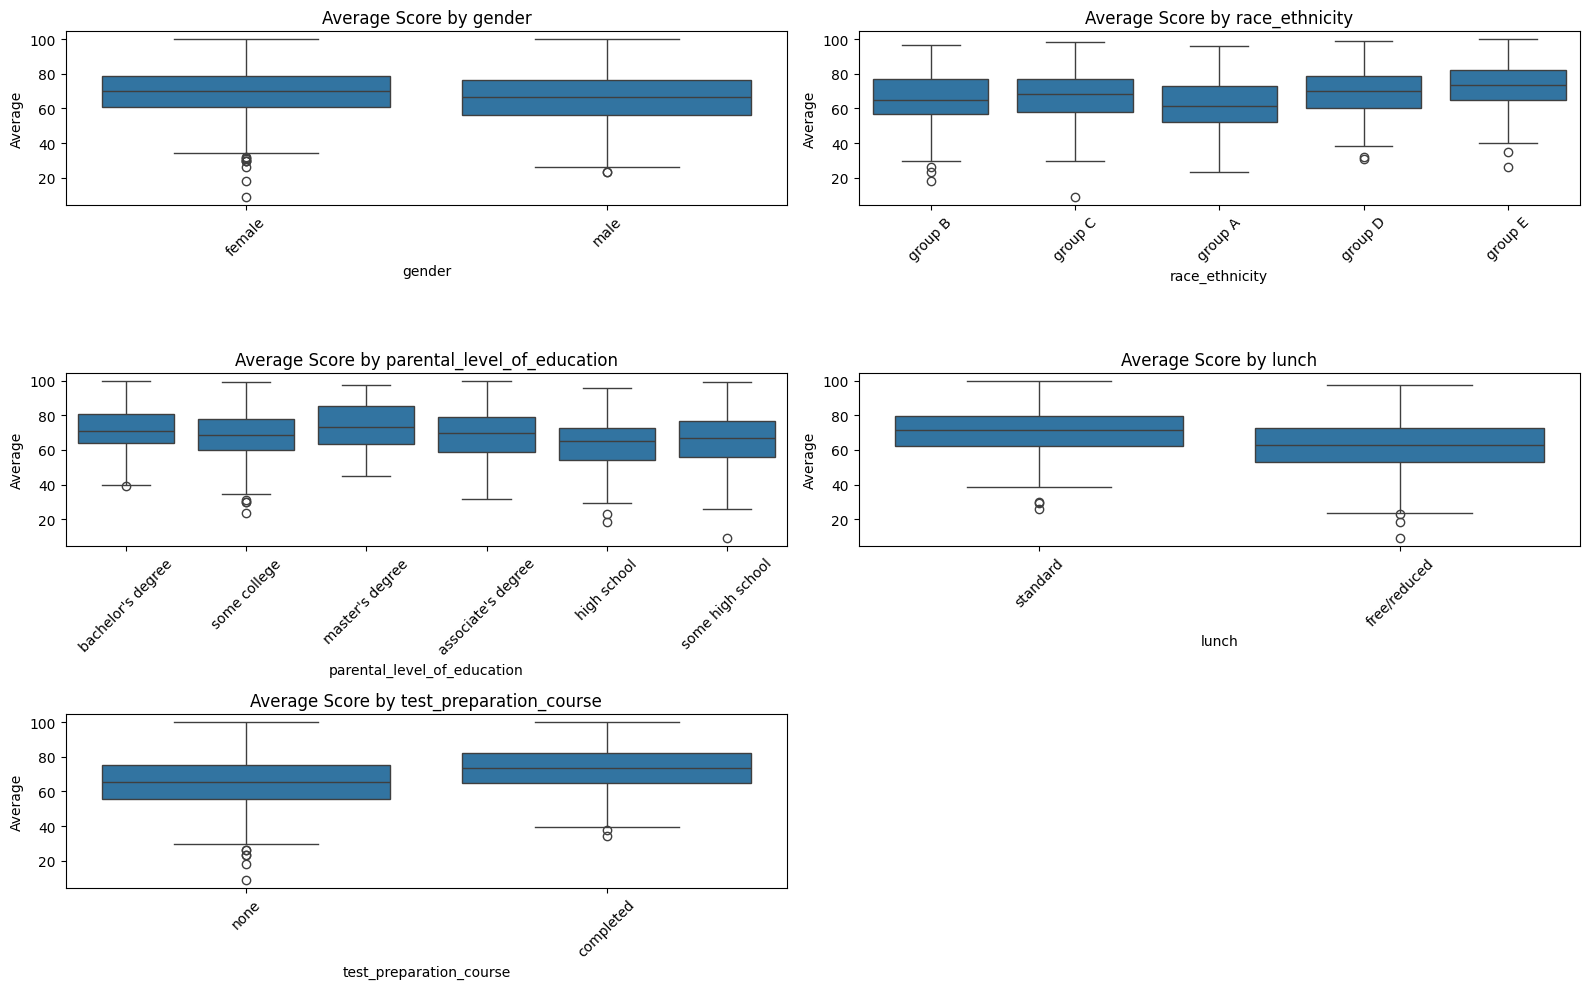

In [42]:
# Bivariate Analysis

# Boxplots: Average score by categorical features
plt.figure(figsize=(16,10))
for i, col in enumerate(cat_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=data[col], y=data['Average'])
    plt.title(f'Average Score by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

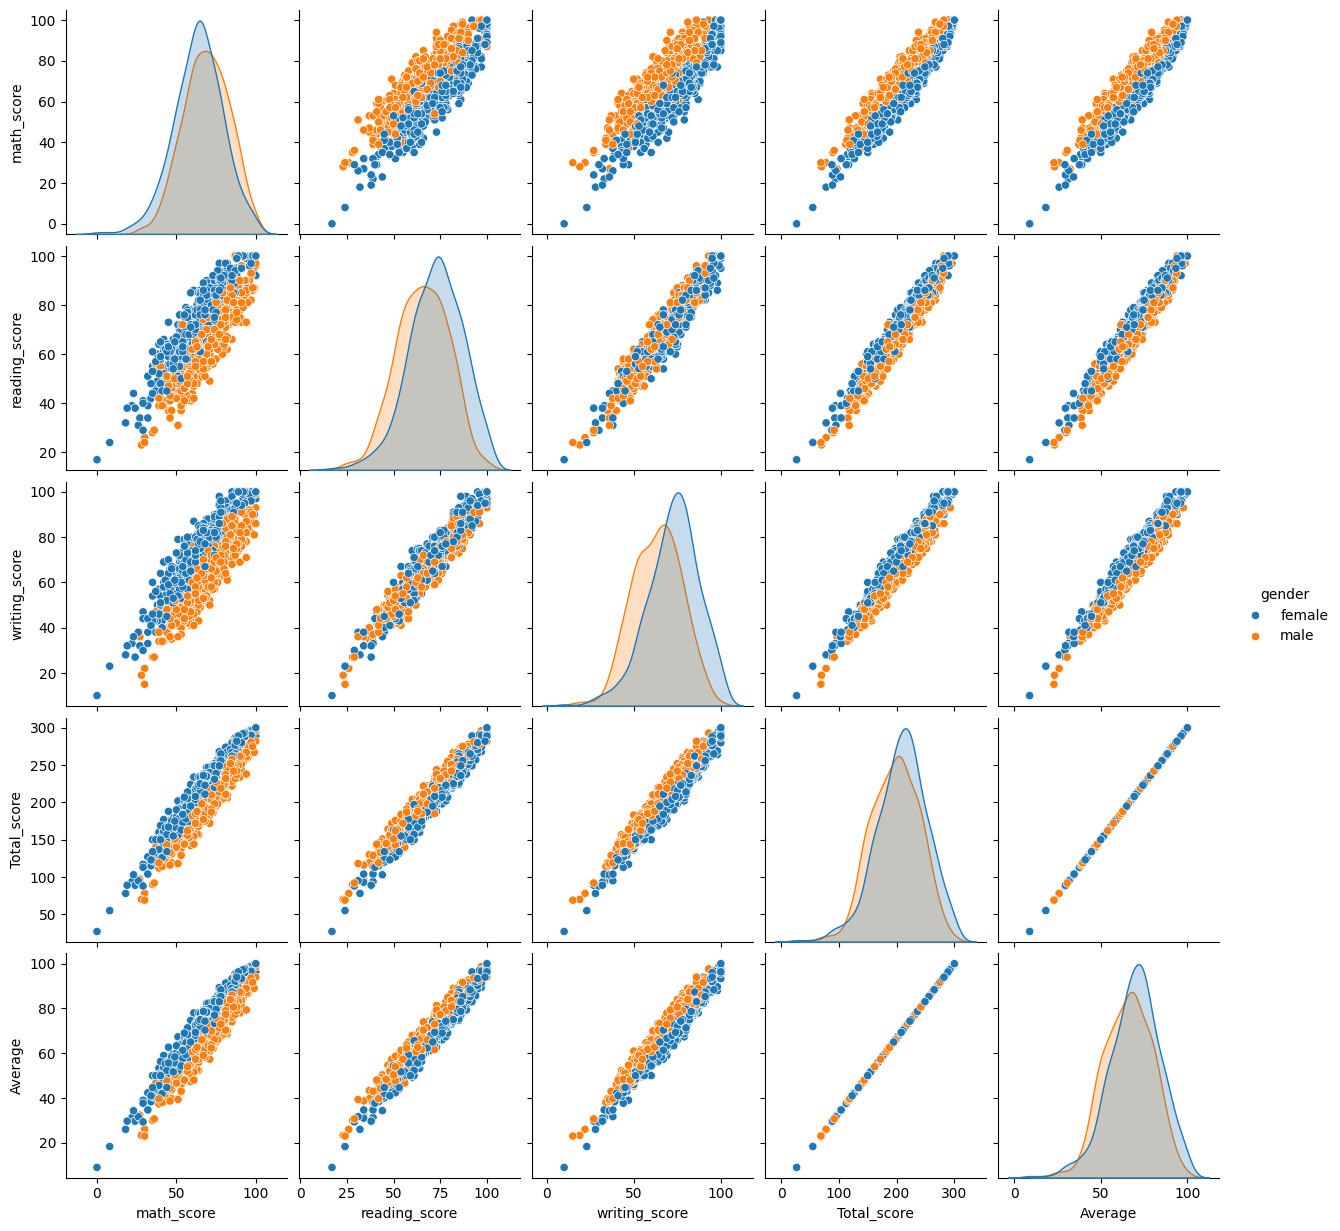

In [43]:
sns.pairplot(data,hue='gender')

- From the above plot it is clear that all the scores increase linearly with each other.

## Model Training

### Import libraries for model training 

In [44]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


Divide the independent and dependent features

In [45]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [65]:
x=data.drop(["Total_score","Average","math_score"],axis='columns')
y=data.math_score

In [66]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [67]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [68]:
x.shape,y.shape

((1000, 7), (1000,))

### convert the categorical features and normalize the values

In [69]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

In [70]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

#### use pipeline and column transformer to convert the feature values

In [71]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [72]:
numerical_transformer=StandardScaler()
one_hot_transformer=OneHotEncoder()

pipeline=ColumnTransformer(
        [
            ("OneHotEncoder",one_hot_transformer,cat_features),
            ("standardsclaer",numerical_transformer,num_features)
        ]
    
)

In [73]:
x=pipeline.fit_transform(x)

In [74]:
x.shape

(1000, 19)

In [75]:
x[0]

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.19399858, 0.39149181])

In [76]:
def evalution(actual,prediction):
    mse=mean_squared_error(actual,prediction)
    mae=mean_absolute_error(actual,prediction)
    rms=np.sqrt(mean_squared_error(actual,prediction))
    r2=r2_score(actual,prediction)
    
    return mse,mae,rms,r2

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [78]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [79]:
models={
    "linearRegressor":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNN":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "SVR":SVR(),
    "RandomForest":RandomForestRegressor(),
    "AdaBoost":AdaBoostRegressor()
}

In [80]:
models_list=[]
accuracy=[]

for i in range(len(models)):
    model=list(models.values())[i]
    #train model
    model.fit(x_train,y_train)
    
    #predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #get the accuracy score for train and test dataset
    train_mse,train_mae,train_rms,train_r2=evalution(y_train,y_train_pred)
    test_mse,test_mae,test_rms,test_r2=evalution(y_test,y_test_pred)
    
    #print the model and the accuracy scores 
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    #Train dataset score
    print("Training data score")
    print("MSE",train_mse)
    print("MAE",train_mae)
    print("RMS",train_rms)
    print("R2",train_r2)
    
    #Test dataset score
    print("Test data scores")
    print("MSE",test_mse)
    print("MAE",test_mae)
    print("RMS",test_rms)
    print("R2",test_r2)
    
    accuracy.append(test_r2)
    
    print('='*50)
    print("\n")

linearRegressor
Training data score
MSE 28.334870380648585
MAE 4.266711846071957
RMS 5.323050852720513
R2 0.8743172040139593
Test data scores
MSE 29.095169866715494
MAE 4.214763142474851
RMS 5.393993869732843
R2 0.8804332983749564


Ridge
Training data score
MSE 28.337788233082456
MAE 4.264987823725977
RMS 5.323324922741656
R2 0.8743042615212908
Test data scores
MSE 29.056272192348263
MAE 4.211100688014261
RMS 5.390387016935636
R2 0.880593148502874


Lasso
Training data score
MSE 43.47840400585577
MAE 5.206302661246526
RMS 6.593815587795565
R2 0.8071462015863458
Test data scores
MSE 42.5064168384116
MAE 5.157881810347763
RMS 6.519694535667419
R2 0.8253197323627853


KNN
Training data score
MSE 32.6859
MAE 4.527
RMS 5.71715838507208
R2 0.8550176780012468
Test data scores
MSE 52.6388
MAE 5.627999999999999
RMS 7.255260160738552
R2 0.7836806685669011


DecisionTree
Training data score
MSE 0.078125
MAE 0.01875
RMS 0.2795084971874737
R2 0.9996534669718089
Test data scores
MSE 66.195
MAE 6.45

In [81]:
pd.DataFrame(list(zip(models_list, accuracy)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge,0.880593
0,linearRegressor,0.880433
6,RandomForest,0.852911
7,AdaBoost,0.848272
2,Lasso,0.825320
3,KNN,0.783681
5,SVR,0.728600
4,DecisionTree,0.727971


## Best Model

In [82]:
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
print("Train score",ridge.score(x_train,y_train))
print("Test Score",ridge.score(x_test,y_test))

Train score 0.8743042615212908
Test Score 0.880593148502874


In [83]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


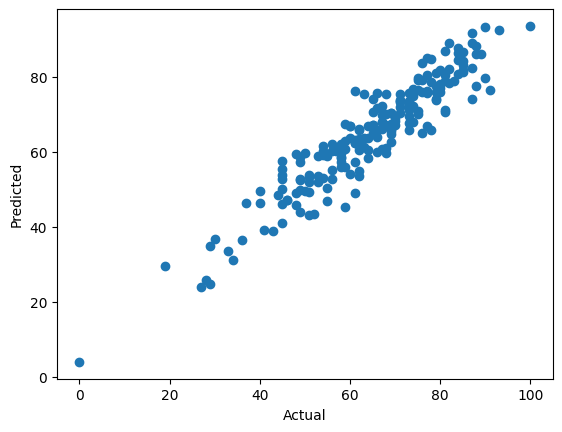

In [84]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

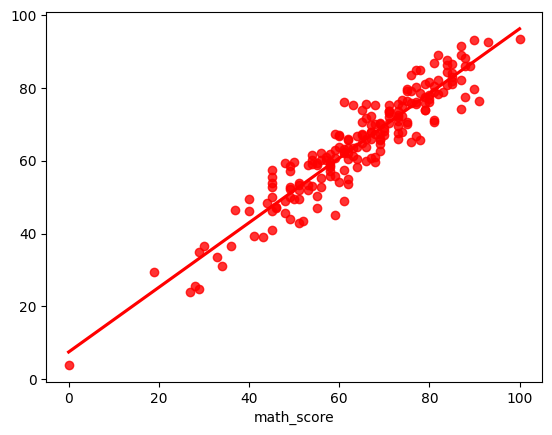

In [85]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');